### Ridge Regression (interpretation)

In this notebook, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:
* Use a pre-built implementation of regression (sklearn) to run polynomial regression
* Use matplotlib to visualize polynomial regressions
* Use a pre-built implementation of regression (sklearn) to run polynomial regression, this time with L2 penalty
* Use matplotlib to visualize polynomial regressions under L2 regularization
* Choose best L2 penalty using cross-validation.
* Assess the final fit using test data.

We will continue to use the House data from previous notebooks.  (In the next programming assignment for this module, you will implement your own ridge regression learning algorithm using gradient descent.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from scipy import stats

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
from sklearn import preprocessing

def polynomial_dataframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_df = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    #poly_df['power_1'] = feature
    #poly_df['power_1'] = pd.Series(preprocessing.scale(feature))
    poly_df['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint - 1. We want it to start at 2 and stop at degree
        for power in range(2, degree + 1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_df[name] = poly_df['power_1'] ** power
            #poly_df[name] = pd.Series(preprocessing.scale(feature ** power))
    return poly_df
# test it
tmp = pd.Series([1., 2., 3.])
print(polynomial_dataframe(tmp, 3))

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


In [3]:
def get_residual_sum_of_squares(model, data, outcome):
    # First get the predictions
    predictions = model.predict(data)    
    # Then compute the residuals/errors
    RSS = outcome-predictions
    # Then square and add them up
    RSS = (RSS*RSS).sum()

    return(RSS)    

In [4]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
# load data
sales = pd.read_csv("../../ML Data & Script/kc_house_data.csv", dtype=dtype_dict)
sales.head()

# sort by sqft_living and price (for plotting purposes)
sales = sales.sort_values(by=['sqft_living', 'price'])

In [5]:
# degree 15 polynomial
X = polynomial_dataframe(sales['sqft_living'], 15)

Y = sales['price']
model15_sk = Ridge(alpha=0.2) 
model15_sk.fit(X, Y)

print("Intercept: ", model15_sk.intercept_,"\n")
print("Cofficents: \n", [str(k) + " : " + str(v) for k, v in zip(X.columns, model15_sk.coef_)])

print("R2: ", model15_sk.score(X, Y))

Intercept:  -1594492414.7448912 

Cofficents: 
 ['power_1 : 861481.3533732521', 'power_2 : -1.390040527399869e-35', 'power_3 : 1.2792319517091156e-29', 'power_4 : 9.94792168220548e-25', 'power_5 : 1.5316619899813914e-20', 'power_6 : -1.2847605807214182e-20', 'power_7 : 5.5300474930358614e-17', 'power_8 : -1.7493507114207349e-19', 'power_9 : 6.95362223893089e-23', 'power_10 : -1.2838497947348125e-26', 'power_11 : 1.448857706836129e-30', 'power_12 : -1.129602088227537e-34', 'power_13 : 6.379774618784748e-39', 'power_14 : -2.4581504109166144e-43', 'power_15 : 4.7258274460150575e-48']
R2:  -48903116.096076


### Observe Overfitting

In [6]:
# randomize data
sales = sales.sample(frac=1,random_state=5)
amount = sales.shape[0] // 4
# create the four sets
set_1 = sales[0:amount * 1].sort_values(by=['sqft_living', 'price'])
set_2 = sales[amount * 1:amount * 2].sort_values(by=['sqft_living', 'price'])
set_3 = sales[amount * 2:amount * 3].sort_values(by=['sqft_living', 'price'])
set_4 = sales[amount * 3:].sort_values(by=['sqft_living', 'price'])

In [7]:
def get_model(dataset, alpha_reg):
    X = polynomial_dataframe(dataset['sqft_living'], 15)
    Y = dataset['price']
    # using sag shows more variance
    model = Ridge(alpha=alpha_reg, normalize=True) 
    model.fit(X, Y)
    coeffs = {"Intercept": str(model.intercept_)}
    for k, v in zip(X.columns, model.coef_):
        coeffs[str(k)] = str(v)
    return X, Y, model, coeffs

set1_X, set1_Y, set1_model, coefficients1 = get_model(set_1, 1e-9)
set2_X, set2_Y, set2_model, coefficients2 = get_model(set_2, 1e-9)
set3_X, set3_Y, set3_model, coefficients3 = get_model(set_3, 1e-9)
set4_X, set4_Y, set4_model, coefficients4 = get_model(set_4, 1e-9)
# merge the dictionaries
# cofficients = {k:list(v) for k in coeffs1.keys() for v in zip(coeffs1.values(), coeffs2.values(), coeffs3.values(), coeffs4.values())}
# convert to dataframe
coefficients = pd.DataFrame(index=coefficients1.keys())
coefficients['Coefficients1'] = coefficients1.values()
coefficients['Coefficients2'] = coefficients2.values()
coefficients['Coefficients3'] = coefficients3.values()
coefficients['Coefficients4'] = coefficients4.values()
coefficients

,Coefficients1,Coefficients2,Coefficients3,Coefficients4
Intercept,-232725.2781977876,46343.951617450104,143800.06994217297,297117.9724547691
power_1,1523.4859552562896,542.7430493218848,160.59507685120428,-153.43468092358034
power_2,-1.7305180272518623,-0.4976364044647639,0.08183110446246875,0.19290613979180216
power_3,0.0010261247566297424,0.0003194966171417857,-0.0001104517830422312,7.015174500704225e-05
power_4,-2.85961786766969e-07,-1.1040738876532767e-07,5.14828744448515e-08,-1.2960248913214037e-07
power_5,2.3834211918165027e-11,1.9562557263734e-11,-8.801129630832139e-12,4.8732010288007015e-11
power_6,4.258193351738165e-15,-9.286264200049818e-16,3.259985478703545e-16,-3.399576139231945e-15
power_7,-4.829980274550909e-19,-1.2367706764756137e-19,4.3227418552887437e-20,-1.1309268387276581e-18
power_8,-8.270100921532085e-23,2.95069798211968e-24,-6.001203901969431e-25,5.940494991449252e-23
power_9,1.9276199579048747e-27,1.0041560310709776e-27,-2.4786243150617027e-28,2.723821603167674e-26


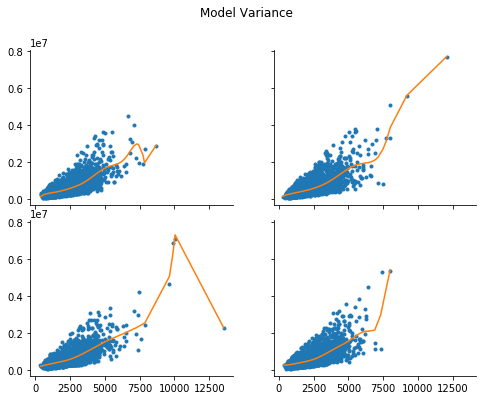

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,6) )
fig.subplots_adjust(hspace = 0.1, wspace = 0.2)
fig.suptitle("Model Variance")
#sns.regplot(set1_X['power_1'], set1_Y, x_estimator=set1_model.predict ,ax=ax1)
ax1.plot(set1_X['power_1'], set1_Y,'.', set1_X['power_1'], set1_model.predict(set1_X),'-')
ax2.plot(set2_X['power_1'], set2_Y,'.', set2_X['power_1'], set2_model.predict(set2_X),'-')
ax3.plot(set3_X['power_1'], set3_Y,'.', set3_X['power_1'], set3_model.predict(set3_X),'-')
ax4.plot(set4_X['power_1'], set4_Y,'.', set4_X['power_1'], set4_model.predict(set4_X),'-')
sns.despine()

plt.show()

* Square feet is in order of thousands therefore these cofficeints are not smal. 
* They is variation in the cofficeints

### Ridge regression comes to rescue

In [9]:
set1_X, set1_Y, set1_model, coefficients1 = get_model(set_1, 1.23e2)
set2_X, set2_Y, set2_model, coefficients2 = get_model(set_2, 1.23e2)
set3_X, set3_Y, set3_model, coefficients3 = get_model(set_3, 1.23e2)
set4_X, set4_Y, set4_model, coefficients4 = get_model(set_4, 1.23e2)
# merge the dictionaries
# cofficients = {k:list(v) for k in coeffs1.keys() for v in zip(coeffs1.values(), coeffs2.values(), coeffs3.values(), coeffs4.values())}
# convert to dataframe
coefficients = pd.DataFrame(index=coefficients1.keys())
coefficients['Coefficients1'] = coefficients1.values()
coefficients['Coefficients2'] = coefficients2.values()
coefficients['Coefficients3'] = coefficients3.values()
coefficients['Coefficients4'] = coefficients4.values()
coefficients

,Coefficients1,Coefficients2,Coefficients3,Coefficients4
Intercept,533015.6212477391,532081.0433437468,530633.024476675,531481.5654561358
power_1,2.1723445713365317,2.2861988798435786,2.202860214009448,2.168752908036015
power_2,0.00040019741553006183,0.00040117058823920573,0.0003464349251060673,0.00041059152765918216
power_3,6.702883857761684e-08,5.260241891363785e-08,3.262513227559605e-08,7.539561860347492e-08
power_4,9.011042294504203e-12,4.523361645134604e-12,1.925836203722901e-12,1.1880018767678286e-11
power_5,1.0365738197680357e-15,3.2589068323303414e-16,1.030222669766157e-16,1.641846887056532e-15
power_6,1.1114019256043014e-19,2.33942131695122e-20,5.687154270894441e-21,2.0929467159919888e-19
power_7,1.1671473474296266e-23,1.744139939380026e-24,3.2903871625020867e-25,2.5637284494073832e-23
power_8,1.22486622934493e-27,1.3454723433751196e-28,1.9846808535314657e-29,3.0928963990960133e-27
power_9,1.2924921832024214e-31,1.0629946751989868e-32,1.2406214778161543e-33,3.7208162356292852e-31


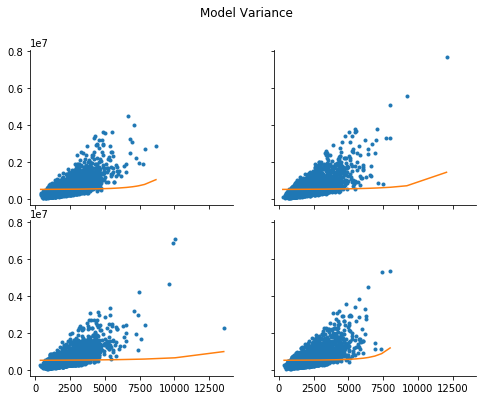

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,6) )
fig.subplots_adjust(hspace = 0.1, wspace = 0.2 )
fig.suptitle("Model Variance")
#sns.regplot(set1_X['power_1'], set1_Y, x_estimator=set1_model.predict ,ax=ax1)
ax1.plot(set1_X['power_1'], set1_Y,'.', set1_X['power_1'], set1_model.predict(set1_X),'-')
ax2.plot(set2_X['power_1'], set2_Y,'.', set2_X['power_1'], set2_model.predict(set2_X),'-')
ax3.plot(set3_X['power_1'], set3_Y,'.', set3_X['power_1'], set3_model.predict(set3_X),'-')
ax4.plot(set4_X['power_1'], set4_Y,'.', set4_X['power_1'], set4_model.predict(set4_X),'-')
sns.despine()
plt.show()

### Selecting an L2 penalty via cross-validation

Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. **Cross-validation** seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called **k-fold cross-validation**. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set<br>
...<br>
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that  all observations are used for both training and validation, as we iterate over segments of data. 

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. We reserve 10% of the data as the test set and shuffle the remainder.

In [11]:
# dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
# train_valid_shuffled = pd.read_csv('../../ML Data & Script/wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
# test = pd.read_csv('../../ML Data & Script/wk3_kc_house_test_data.csv', dtype=dtype_dict)

# X_train_valid = train_valid_shuffled["sqft_living"]
# y_train_valid = train_valid_shuffled['price']
# X_test = test['sqft_living']
# y_test = test['price']

In [12]:
from sklearn.model_selection import train_test_split
X = sales['sqft_living']
y = sales['price']
# obtain 10% test data and remaining 90%
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, train_size = 0.9 , test_size=0.1, shuffle=True)
X_train_valid.head()

9786     2130.0
20855    1300.0
2982     3000.0
18700    2680.0
11446    4130.0
Name: sqft_living, dtype: float64

In [13]:
# print("whole data: ", len(sales))
# print("90% ", len(sales) * 0.9)

In [14]:
# 10-fold cross-validation
n = len(X_train_valid)
k = 10 
for i in range(k):
    start = (n * i) // k
    end = (n * (i + 1)) // k - 1
    print (i, (start, end))

0 (0, 1944)
1 (1945, 3889)
2 (3890, 5834)
3 (5835, 7779)
4 (7780, 9724)
5 (9725, 11669)
6 (11670, 13614)
7 (13615, 15559)
8 (15560, 17504)
9 (17505, 19450)


In [15]:
print(n)

19451


### KFold Cross Validation(from scratch)


Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:
* We will again be aiming to fit a 15th-order polynomial model using the `sqft_living` input
* For `l2_penalty` in [10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7] (to get this in Python, you can use this Numpy function: `np.logspace(1, 7, num=13)`.)
    * Run 10-fold cross-validation with `l2_penalty`
* Report which L2 penalty produced the lowest average validation error.

Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop.

In [16]:
# perfrom k-fold cross validation on training-validation set
def k_fold_cross_validation(k, l2_penalty, X, y):
    errors = []
    n = len(X)
    for i in range(k):
        #Compute starting and ending indices of segment i and call 'start' and 'end'
        start = (n * i) // k
        end = (n * (i + 1)) // k - 1
        #Form validation set by taking a slice (start:end+1) from the data.
        X_val = X[start:end+1]  
        y_val = y[start:end+1]
        #Form training set by appending slice (end+1:n) to the end of slice (0:start).
        X_train = X[0:start].append(X[end+1:n])
        y_train = y[0:start].append(y[end+1:n])
        #Train a linear model using training set just formed, with a given l2_penalty
        model = Ridge(alpha=l2_penalty, normalize=True) 
        model.fit(X_train, y_train)
        #Compute validation error using validation set just formed
        error = get_residual_sum_of_squares(model, X_val, y_val)
        errors.append(error)
        #print("Lengths: ", len(X_val), len(X_train))
    #print(np.mean(errors))
    return np.mean(errors)

from sklearn.model_selection import train_test_split
X = sales['sqft_living']
y = sales['price']
X_train_valid_poly = polynomial_dataframe(X_train_valid, 15)
minimum = k_fold_cross_validation(10, 1, X_train_valid_poly, y_train_valid)
best_lambda = 1
#alphas = np.logspace(-5, 9,20)
alphas = np.array([1,1e-1,0.0775, 0.055,1e-2,1e-3,1e-4,1e-5,0])
errors = []
for L in alphas:
    average_error = k_fold_cross_validation(10, L, X_train_valid_poly, y_train_valid)
    errors.append(average_error)
    print("Lambda: ", L, "Error: ", average_error)
    if(average_error < minimum):
        minimum = average_error
        best_lambda = L
print("best value for L2 penality is: " , best_lambda)
print("the smallest error is: ", minimum)

Lambda:  1.0 Error:  133046382517983.92
Lambda:  0.1 Error:  121440960336848.84
Lambda:  0.0775 Error:  121474324809574.03
Lambda:  0.055 Error:  121848138022837.83
Lambda:  0.01 Error:  157783409838377.8
Lambda:  0.001 Error:  530653025910253.1
Lambda:  0.0001 Error:  744142676830973.0
Lambda:  1e-05 Error:  133974753345912.3
Lambda:  0.0 Error:  2.436942124483598e+20
best value for L2 penality is:  0.1
the smallest error is:  121440960336848.84


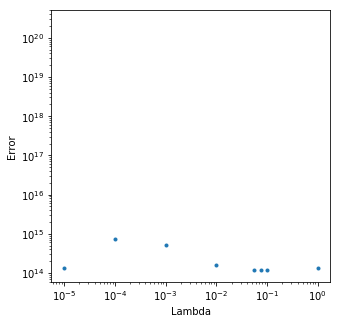

In [17]:
# Plot the l2_penalty values in the x axis and the cross-validation error in the y axis.
# Using plt.xscale('log') will make your plot more intuitive.
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(5,5))
plt.xscale('log')
plt.yscale('log')
#plt.axis([0, 10, 0, 20])
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.plot(alphas,errors,'.')
plt.show()
#look at the sweet spot (lamda=1e3)

### KFold CV (GridSearchCV)

In [18]:
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([1,1e-1,0.0775, 0.055,1e-2,1e-3,1e-4,1e-5,0])
#alphas = np.logspace(-5,9,20)

# create and fit a ridge regression model, testing each alpha
modelG = Ridge(normalize=True)
grid = GridSearchCV(estimator=modelG, param_grid=dict(alpha=alphas), scoring='r2')
grid.fit(X_train_valid_poly, y_train_valid)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00e+00, 1.00e-01, 7.75e-02, 5.50e-02, 1.00e-02, 1.00e-03,
       1.00e-04, 1.00e-05, 0.00e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)
0.5258924050392876
0.1


### Test Model

Once you found the best value for the L2 penalty using cross-validation, it is important to retrain a final model on all of the training data using this value of `l2_penalty`. This way, your final model will be trained on the entire dataset.

In [19]:
model = Ridge(alpha=0.055, normalize=True) 
model.fit(X_train_valid_poly, y_train_valid)
rss_train = get_residual_sum_of_squares(model, X_train_valid_poly, y_train_valid)

X_test_poly = polynomial_dataframe(X_test, 15)
rss_test = get_residual_sum_of_squares(model, X_test_poly, y_test)
#print("Training Error(RSS): ", rss_train)
print("Test Error(RSS): ", rss_test)
#print("Training Error(RMSE): ", np.sqrt(rss_train / len(y_train_valid)))
#print("Test Error(RMSE): ", np.sqrt(rss_test) / len(y_test))

from sklearn.metrics import r2_score
print("Training (R2): ", r2_score(y_train_valid, model.predict(X_train_valid_poly)))
print("Test (R2): ", r2_score(y_test, model.predict(X_test_poly)))

Test Error(RSS):  115547380437625.5
Training (R2):  0.5422672895857197
Test (R2):  0.5804005698498849


In [20]:
# no regularization
model = Ridge(alpha=0, normalize=True) 
model.fit(X_train_valid_poly, y_train_valid)
rss_train = get_residual_sum_of_squares(model, X_train_valid_poly, y_train_valid)

X_test_poly = polynomial_dataframe(X_test, 15)
rss_test = get_residual_sum_of_squares(model, X_test_poly, y_test)
#print("Training Error(RSS): ", rss_train)
print("Test Error(RSS): ", rss_test)
#print("Training Error(RMSE): ", np.sqrt(rss_train / len(y_train_valid)))
#print("Test Error(RMSE): ", np.sqrt(rss_test) / len(y_test))

from sklearn.metrics import r2_score
print("Training (R2): ", r2_score(y_train_valid, model.predict(X_train_valid_poly)))
print("Test (R2): ", r2_score(y_test, model.predict(X_test_poly)))

Test Error(RSS):  119775754539314.22
Training (R2):  0.5511558947532638
Test (R2):  0.5650456275153171


### Lasso

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
# prepare a range of alpha values to test
alphas = np.array([1e3,1e2,1e1,1,1e-1,1e-2,1e-3,1e-4,1e-5,0])
#alphas = np.logspace(-5,9,20)

# create and fit a lasso regression model, testing each alpha
modelG = Lasso(normalize=True)
grid = GridSearchCV(estimator=modelG, param_grid=dict(alpha=alphas), scoring='r2')
grid.fit(X_train_valid_poly, y_train_valid)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04,
       1.e-05, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)
0.5210028818211139
10.0


In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=grid.best_score_, normalize=True) 
model.fit(X_train_valid_poly, y_train_valid)
rss_train = get_residual_sum_of_squares(model, X_train_valid_poly, y_train_valid)

X_test_poly = polynomial_dataframe(X_test, 15)
rss_test = get_residual_sum_of_squares(model, X_test_poly, y_test)
#print("Training Error(RSS): ", rss_train)
print("Test Error(RSS): ", rss_test)
#print("Training Error(RMSE): ", np.sqrt(rss_train / len(y_train_valid)))
#print("Test Error(RMSE): ", np.sqrt(rss_test) / len(y_test))

from sklearn.metrics import r2_score
print("Training (R2): ", r2_score(y_train_valid, model.predict(X_train_valid_poly)))
print("Test (R2): ", r2_score(y_test, model.predict(X_test_poly)))

In [ ]:
# no regularization
model = Lasso(alpha=0, normalize=True) 
model.fit(X_train_valid_poly, y_train_valid)
rss_train = get_residual_sum_of_squares(model, X_train_valid_poly, y_train_valid)

X_test_poly = polynomial_dataframe(X_test, 15)
rss_test = get_residual_sum_of_squares(model, X_test_poly, y_test)
#print("Training Error(RSS): ", rss_train)
print("Test Error(RSS): ", rss_test)
#print("Training Error(RMSE): ", np.sqrt(rss_train / len(y_train_valid)))
#print("Test Error(RMSE): ", np.sqrt(rss_test) / len(y_test))

from sklearn.metrics import r2_score
print("Training (R2): ", r2_score(y_train_valid, model.predict(X_train_valid_poly)))
print("Test (R2): ", r2_score(y_test, model.predict(X_test_poly)))

#### Reflection

Too big cofficients are related to multicolinearity and overfitting. An overfitted model has high variance. I created many polynomial features(from 1st degree up to 15th degree). I divided the dataset into four sets and showed how a complex model performs differently on different sets of data from the same source. Here, complexity is exhibted by having many correlated features. The cofficeients may look quite small but sqft_living is in the order of thousands therefore they are not small as they look.

A Ridge regression model(normalize = True) was able to remove the high-variance(or overfitting). The lambda value is tricky. I learned that scikit-learn regularization parameters are not as big as Graphlab's. For the first model a lambda value less than 100 works but on the later models, lambda values between 0 and 1 seem to perform well.


I divided the data into two parts

* Train/Validation 90%
* Test 10%

Sample datasets were given on Coursera for the above. But that will be too restricted, So I splitted and created the datasets using sklearn and it shuffles Train/Validation set before performing validation. I performed K-fold cross validation and tried to find the best lambda value. I did the validation mannualy first. And Max pointed me GridSearch. I trained the model using the best lambda value. Finally I tested the model's performance on the test set. The best lambda value is mostly 0.055, regardless of the selected train/validation set. 

Finally, I compared a non-regularized model(alpha=0) to the regularized model(alpha=0.055). First I found the non-regularaized model having smaller test-error than the regulariazed one. This was discouraging becasue my goal was to remove overfitting so that the regularaized model could generalize to unseen data. The good news is the regularaized model generalizes better for many test sets and occasionally the non-regularaized one may work slighly better. 

I tried Lasso Regression(Hyper-parameter Selection, Training and Testing) it performed better than Ridge on the test-set. (R2= 0.64) 